In [1]:
from PositionManager import PositionManager
from Structure import Structure
import pandas as pd

pm = PositionManager(True)

In [2]:
csv_file_paths = [
    "quotes/BILI_20250131.csv",
    "quotes/TSLA_20250107.csv",
    "quotes/TSLA_20250131.csv",
    "quotes/NVDA_20250203.csv"
]

from fake_data import *
csv_data = load_csv_data(csv_file_paths[1])

In [3]:
current_index = 0
contract = 'TSLA'
while True:
    bars, current_index = fake_fetch_minute_data(contract, csv_data, current_index)
    if bars is None: break
    bars = pd.DataFrame(bars)
    structure = Structure()
    # structure.cal(bars)
    current_time = bars.iloc[-1]["date"]
    pm.update(contract, structure, bars, current_time)

开仓: TSLA, 方向： Bought, 价格: 393.55, 时间: 2025-01-07 10:37:00-05:00
平仓: 某股票, 价格: 392.72, 时间：2025-01-07 10:38:00-05:00, 平仓原因：平仓信号：MACD背离方向变化
开仓: TSLA, 方向： Bought, 价格: 392.14, 时间: 2025-01-07 10:40:00-05:00
平仓: 某股票, 价格: 398.0, 时间：2025-01-07 11:05:00-05:00, 平仓原因：平仓信号：MACD背离方向变化
开仓: TSLA, 方向： Sold, 价格: 397.4, 时间: 2025-01-07 11:30:00-05:00
平仓: 某股票, 价格: 396.74, 时间：2025-01-07 11:40:00-05:00, 平仓原因：平仓信号：MACD背离方向变化


In [4]:
pd.DataFrame(pm.trade_log)

,symbol,open_or_close,direction,amount,date
0,某股票,开仓,Bought,100,2025-01-07 10:37:00-05:00
1,某股票,平仓,Sold,-100,2025-01-07 10:38:00-05:00
2,某股票,开仓,Bought,100,2025-01-07 10:40:00-05:00
3,某股票,平仓,Sold,-100,2025-01-07 11:05:00-05:00
4,某股票,开仓,Sold,-100,2025-01-07 11:30:00-05:00
5,某股票,平仓,Bought,100,2025-01-07 11:40:00-05:00


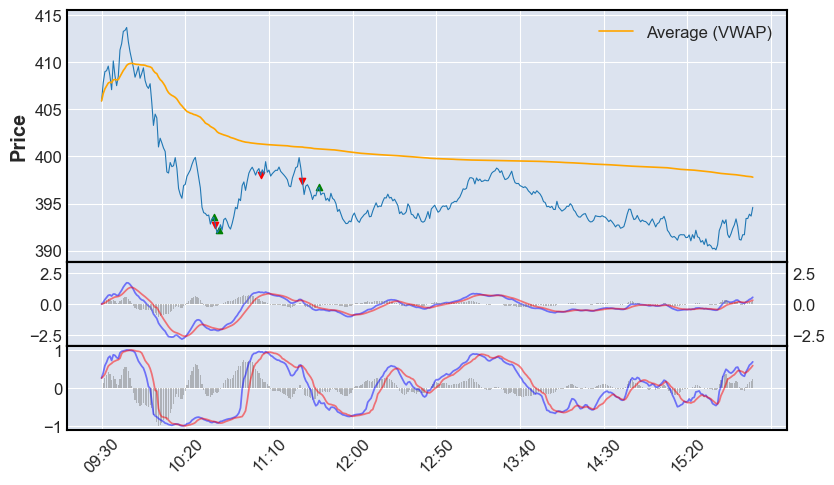

In [5]:
from plot import plot_trade_history, plot_debug_structure
df = structure.data.set_index('date', inplace=True, drop=False)
plot_debug_structure(structure.data, pm.trade_log)
# plot_trade_history(structure.data, pm.trade_log)